<p><font size="6"><b> CASE - Bike count data</b></font></p>


> *DS Data manipulation, analysis and visualisation in Python*  
> *December, 2017*

> *© 2016, Joris Van den Bossche and Stijn Van Hoey  (<mailto:jorisvandenbossche@gmail.com>, <mailto:stijnvanhoey@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

---

<img src="https://nbocdn.akamaized.net/Assets/Images_Upload/2016/11/24/GEFV45415.jpg?maxheight=460&maxwidth=638">

In this case study, we will make use of the freely available bike count data of the city of Ghent. At the Coupure Links, next to the Faculty of Bioscience Engineering, a counter keeps track of the number of passing cyclists in both directions.  
Those data are available on the open data portal of the city: 
https://data.stad.gent/data/178

In [111]:
%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')
import matplotlib.dates as mdates

## Reading and processing the data

### Read csv data from URL

The data are avaible in CSV, JSON and XML format. We will make use of the CSV data. The link to download the data can be found on the webpage. For the first dataset, this is:

    link = "https://datatank.stad.gent/4/mobiliteit/fietstellingencoupure201210tot201403.csv"
    
A limit defines the size of the requested data set, by adding a limit parameter `limit` to the URL :

    link = "https://datatank.stad.gent/4/mobiliteit/fietstellingencoupure201210tot201403.csv?limit=100000"

Those datasets contain the historical data of the bike counters, and consist of the following columns:

- The first column `dag` is the date, in `dd.mm.yy` format
- The second column `tijdstip` is the time of the day, in `hh:mm:ss` format
- The third and fourth column `noord` and `zuid` are the counts at that point in time (counts between this timestamp and the previous)
- The fifth column, `actief`, indicates whether the device was active or not

In [37]:
limit = 100000
link = "https://datatank.stad.gent/4/mobiliteit/fietstellingencoupure201210tot201403.csv?limit={}".format(limit)

<div class="alert alert-success">
 <b>EXERCISE</b>:
 <ul>
  <li>Read the csv file from the url into a DataFrame `df`, the delimiter of the data is `;`</li>
  <li>Inspect the first and last 5 rows, and check the number of observations</li>
  <li>Inspect the data types of the different columns</li>

</ul> 

</div>

In [22]:
bike = pd.read_csv(link, delimiter=";")

In [23]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
dag         50000 non-null object
tijdstip    50000 non-null object
noord       50000 non-null int64
zuid        50000 non-null int64
actief      14 non-null object
dtypes: int64(2), object(3)
memory usage: 1.9+ MB


In [24]:
bike.head()

,dag,tijdstip,noord,zuid,actief
0,12.10.12,23:12:21,7,10,NaN
1,12.10.12,23:27:21,16,18,NaN
2,12.10.12,23:42:21,7,17,NaN
3,12.10.12,23:57:21,1,12,NaN
4,13.10.12,0:12:21,6,5,NaN


In [25]:
bike.describe()

,noord,zuid
count,50000.000000,50000.000000
mean,23.765480,23.551200
std,30.168124,25.302444
min,0.000000,0.000000
25%,5.000000,6.000000
50%,16.000000,16.000000
75%,31.000000,31.000000
max,361.000000,299.000000


In [26]:
bike.head()

,dag,tijdstip,noord,zuid,actief
0,12.10.12,23:12:21,7,10,NaN
1,12.10.12,23:27:21,16,18,NaN
2,12.10.12,23:42:21,7,17,NaN
3,12.10.12,23:57:21,1,12,NaN
4,13.10.12,0:12:21,6,5,NaN


### Data processing

As explained above, the first and second column (respectively `dag` and `tijdstip`) indicate the date and hour of the day. To obtain a time series, we have to combine those two columns into one series of actual datetime values. 

<div class="alert alert-success">

 <b>EXERCISE</b>: Process the data

 <ul>
  <li>Combine the 'dag' and 'tijdstip' columns into one Series of string datetime values </li>
  <li>Parse the string datetime values</li>
  <li>Set the resulting dates as the index</li>
  <li>Remove the original 'dag' and 'tijdstip' columns</li>
  <li>Rename the 'noord', 'zuid' and 'actief' columns to 'north', 'south' and 'active'</li>
</ul> 

</div>

In [27]:
bike['datetime'] = pd.to_datetime(bike['dag'] + " " + bike['tijdstip'], dayfirst=True)

In [28]:
bike.head()

,dag,tijdstip,noord,zuid,actief,datetime
0,12.10.12,23:12:21,7,10,NaN,2012-10-12 23:12:21
1,12.10.12,23:27:21,16,18,NaN,2012-10-12 23:27:21
2,12.10.12,23:42:21,7,17,NaN,2012-10-12 23:42:21
3,12.10.12,23:57:21,1,12,NaN,2012-10-12 23:57:21
4,13.10.12,0:12:21,6,5,NaN,2012-10-13 00:12:21


In [29]:
bike1 = bike.drop(['dag', 'tijdstip'], axis=1)

In [30]:
bike1.rename(columns={'noord':'nord', 'zuid':'sud', 'actief':'active'}, inplace=True)

In [31]:
bike1.head()

,nord,sud,active,datetime
0,7,10,NaN,2012-10-12 23:12:21
1,16,18,NaN,2012-10-12 23:27:21
2,7,17,NaN,2012-10-12 23:42:21
3,1,12,NaN,2012-10-12 23:57:21
4,6,5,NaN,2012-10-13 00:12:21


In [32]:
bike1.set_index('datetime', inplace=True)

In [33]:
bike1.head()

,nord,sud,active
datetime,,,
2012-10-12 23:12:21,7,10,NaN
2012-10-12 23:27:21,16,18,NaN
2012-10-12 23:42:21,7,17,NaN
2012-10-12 23:57:21,1,12,NaN
2012-10-13 00:12:21,6,5,NaN


Having the data available with an interpreted datetime, provides us the possibility of having time aware plotting:

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))
bike1.plot(colormap='coolwarm', ax=ax)

<IPython.core.display.Javascript object>

<div class="alert alert-warning">

 <b>Remark</b>: Interpretation of the dates with and without predefined dateformat

</div>

When we just want to interpret the dates, without specifying how the dates are formatted, Pandas makes an attempt as good as possible:

In [35]:
%timeit pd.to_datetime(combined, dayfirst=True)

NameError: name 'combined' is not defined

However, when we already know the format of the dates, we can use this information to interpret the dates:

In [ ]:
%timeit pd.to_datetime(combined, format="%d.%m.%y %H:%M:%S")

<div class="alert alert-info">

 <b>Remember</b>: Whenever possible, specify the dateformat to interpret the dates to datetime values!

</div>

### Combining the download  and processing of different data sets

The bike count data are available in multiple datasets for several periods. 

In [38]:
link1 = "https://datatank.stad.gent/4/mobiliteit/fietstellingencoupure201210tot201403.csv?limit=100000"
link2 = "https://datatank.stad.gent/4/mobiliteit/fietstellingencoupure201312tot201505.csv?limit=100000"

To obtain the full time series, we will have to combine those datasets.

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Write a function `process_bike_count_data(df)` that performs the processing steps as done above for an input DataFrame and return the updated DataFrame</li>
</ul> 

</div>

In [39]:
def process_bike_count_data(df):
    df['datetime'] = pd.to_datetime(df['dag'] + " " + df['tijdstip'], dayfirst=True)
    df.set_index('datetime', inplace=True)
    df.drop(['dag', 'tijdstip'], axis=1, inplace=True)
    df.rename(columns={'noord':'nord', 'zuid':'sud', 'actief':'active'}, inplace=True)
    return df

In [40]:
df1 = pd.read_csv(link1, sep=';')
df1 = process_bike_count_data(df1)

In [41]:
df1.head()

,nord,sud,active
datetime,,,
2012-10-12 23:12:21,7,10,NaN
2012-10-12 23:27:21,16,18,NaN
2012-10-12 23:42:21,7,17,NaN
2012-10-12 23:57:21,1,12,NaN
2012-10-13 00:12:21,6,5,NaN


In [42]:
df2 = pd.read_csv(link2, sep=';')
df2 = process_bike_count_data(df2)


In [43]:
df2_subset= df2[df2.index>= "2014-03-17 17:05:10"]

In [44]:
df2_subset.tail()

,nord,sud,active
datetime,,,
2015-05-27 10:25:02,42,25,NaN
2015-05-27 10:40:02,47,35,NaN
2015-05-27 10:55:02,33,25,NaN
2015-05-27 11:10:02,31,15,NaN
2015-05-27 11:25:02,42,22,NaN


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Concatenate both datasets `df1` and `df2`. <br>**Attention!**: there is some overlap, so use a subset of `df2`, starting at "2014-03-17 17:05:10"</li>
</ul>
</div>

In [45]:
concat = pd.concat([df1, df2_subset])

In [46]:
concat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91831 entries, 2012-10-12 23:12:21 to 2015-05-27 11:25:02
Data columns (total 3 columns):
nord      91831 non-null int64
sud       91831 non-null int64
active    26 non-null object
dtypes: int64(2), object(1)
memory usage: 2.8+ MB


### Alternative handling of overlap in individual data sets

Instead of selecting a subset of `df2`, we also could execute a more *lazy* approach:
* concatenate the two dataframes
* remove the duplicate rows of the resulting dataframe (**Attention!**, the index is not taken into account when removing duplicates)

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Concatenate both datasets `df1` and `df2` as such and remove the duplicate values. Store the result in a DataFrame `df3`</li>
</ul>
</div>

In [47]:
df3 = df1.combine_first(df2)

Checking if we get the same result, by evaluating the info and testing if `df` and `df3` are the same:

In [48]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91831 entries, 2012-10-12 23:12:21 to 2015-05-27 11:25:02
Data columns (total 3 columns):
nord      91831 non-null float64
sud       91831 non-null float64
active    26 non-null object
dtypes: float64(2), object(1)
memory usage: 2.8+ MB


Check if the resulting DataFrame corresponds to our manually removed overlap:

In [49]:
df3.equals(concat)

False

Remark the difference... This has actullay nothing to do with the way data is combined, but due to 2 records on the same moment with a difference in the `active` column (check `2013-11-21 03:40:23` in `df` and `df3`).

In [50]:
concat[concat.index=='2013-11-21 03:40:23']

,nord,sud,active
datetime,,,
2013-11-21 03:40:23,1,9,NaN
2013-11-21 03:40:23,1,9,OFF


In [51]:
df3[df3.index=='2013-11-21 03:40:23']

,nord,sud,active
datetime,,,
2013-11-21 03:40:23,1.0,9.0,NaN
2013-11-21 03:40:23,1.0,9.0,OFF


### Store our collected dataset as an interim data product

As we finished our data-collection step, we want to save this result as a interim data output of our small investigation. As such, we do not have to re-download all the files each time something went wrong, but can restart from our interim step.

In [52]:
df3.to_csv("bike_count_interim.csv")

## Data exploration and analysis

We now have the combined and cleaned-up dataset of the bike counts at Coupure Links. But there are two more things we want to check and we want to get an impression of the characteristics and properties of the data

### Load the interim data

Reading the file in from the interim file (when you want to rerun the whole analysis on the updated online data, you would comment out this cell...)

In [53]:
df = pd.read_csv("bike_count_interim.csv", index_col=0, parse_dates=True)

### Activity of the bike counts

There is a column 'active' which should indicates if the count device was working. Let's have a look a this column.

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>What are the different unique values of the 'active' column and how many times does each of these values occur?</li>
</ul> 

</div>

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91831 entries, 2012-10-12 23:12:21 to 2015-05-27 11:25:02
Data columns (total 3 columns):
nord      91831 non-null float64
sud       91831 non-null float64
active    26 non-null object
dtypes: float64(2), object(1)
memory usage: 2.8+ MB


In [55]:
df.active.unique()

array([nan, 'OFF'], dtype=object)

In [56]:
df[df['active'] == 'OFF'].count()

nord      26
sud       26
active    26
dtype: int64

In [57]:
df.active.isnull().sum(axis=0)

91805

We are only interested in the periods of data when the device was working:

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Remove all rows where the device was not working</li>
</ul> 

</div>

In [58]:
df = df[df['active']!='OFF']

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91805 entries, 2012-10-12 23:12:21 to 2015-05-27 11:25:02
Data columns (total 3 columns):
nord      91805 non-null float64
sud       91805 non-null float64
active    0 non-null object
dtypes: float64(2), object(1)
memory usage: 2.8+ MB


### Count interval verification

The number of bikers are counted for intervals of approximately 15 minutes. But let's check if this is indeed the case.  
For this, we want to calculate the difference between each of the consecutive values of the index. We can use the `Series.diff()` method:

In [60]:
pd.Series(df.index).diff()

0            NaT
1       00:15:00
2       00:15:00
3       00:15:00
4       00:15:00
          ...   
91800   00:15:00
91801   00:15:00
91802   00:15:00
91803   00:15:00
91804   00:15:00
Name: datetime, Length: 91805, dtype: timedelta64[ns]

Again, the count of the possible intervals is of interest:

In [61]:
pd.Series(df.index).diff().value_counts()

00:15:00    91754
00:00:01       12
00:14:59        9
01:15:01        3
00:28:03        1
00:27:57        1
00:21:33        1
00:18:18        1
00:46:54        1
00:23:40        1
00:26:02        1
00:44:40        1
00:27:59        1
00:18:01        1
00:23:18        1
00:24:57        1
00:25:25        1
00:21:25        1
00:37:35        1
00:20:26        1
00:41:03        1
00:19:05        1
00:27:37        1
00:24:32        1
00:22:33        1
00:43:15        1
00:26:01        1
00:27:35        1
00:15:20        1
00:19:21        1
Name: datetime, dtype: int64

There are a few records that is not exactly 15min. But given it are only a few ones, we will ignore this for the current case study and just keep them as such for this explorative study.  
Bonus question: do you know where the values of `-1 days +23:15:01` and `01:15:01` are coming from?

In [62]:
df.describe()

,nord,sud
count,91805.000000,91805.000000
mean,25.240935,25.101628
std,31.458288,26.690699
min,0.000000,0.000000
25%,5.000000,6.000000
50%,17.000000,17.000000
75%,33.000000,33.000000
max,361.000000,299.000000


### Count statistics

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>What is the average number of bikers passing each 15 min?</li>
</ul> 

</div>

In [ ]:
# 25.2 pour nord et 25.1 pour sud

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>What is the average number of bikers passing each hour?</li>
</ul> 

</div>

In [63]:
dfhour = df.groupby([df.index.hour])

In [64]:
dfhour.mean()

,nord,sud
datetime,,
0,7.606219,13.983538
1,5.091693,9.419540
2,3.056471,6.342745
3,1.834117,4.793626
4,1.313741,4.019854
5,2.210870,3.511367
6,7.056949,3.200627
7,25.570196,6.259869
8,91.086752,30.873530


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>What are the 10 highest peak values observed during any of the intervals?</li>
</ul> 

</div>

In [65]:
df.sort_values(by="nord", ascending=False).head(10)

,nord,sud,active
datetime,,,
2013-10-16 21:38:28,361.0,43.0,NaN
2014-09-23 08:57:42,333.0,124.0,NaN
2013-10-03 08:49:43,318.0,77.0,NaN
2014-09-30 08:50:15,315.0,122.0,NaN
2013-09-23 08:34:43,314.0,119.0,NaN
2013-09-24 08:34:43,313.0,117.0,NaN
2014-09-24 08:57:42,313.0,135.0,NaN
2013-09-25 08:49:43,303.0,80.0,NaN
2013-06-05 03:37:45,303.0,16.0,NaN


In [66]:
df.sort_values(by="sud", ascending=False).head(10)

,nord,sud,active
datetime,,,
2012-10-30 23:52:19,217.0,299.0,NaN
2012-10-30 21:27:22,224.0,256.0,NaN
2012-10-26 00:57:21,106.0,226.0,NaN
2015-04-02 00:27:03,39.0,221.0,NaN
2012-10-26 01:12:21,131.0,217.0,NaN
2012-10-30 23:12:22,178.0,215.0,NaN
2012-10-30 22:57:22,266.0,214.0,NaN
2013-10-16 23:53:28,61.0,210.0,NaN
2014-10-22 16:50:15,221.0,209.0,NaN


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>What is the maximum number of cyclist that passed on a single day (both directions combined)?</li>
</ul> 

</div>

In [67]:
df['cumul']=df['nord']+df['sud']

In [68]:
df.head()

,nord,sud,active,cumul
datetime,,,,
2012-10-12 23:12:21,7.0,10.0,NaN,17.0
2012-10-12 23:27:21,16.0,18.0,NaN,34.0
2012-10-12 23:42:21,7.0,17.0,NaN,24.0
2012-10-12 23:57:21,1.0,12.0,NaN,13.0
2012-10-13 00:12:21,6.0,5.0,NaN,11.0


In [69]:
df_daily_max = df.resample('D').cumul.sum().max()

In [70]:
df_daily_max

10269.0

2013-06-05 was the first time more than 10,000 bikers passed on one day. Apparanlty, this was not just by coincidence... http://www.nieuwsblad.be/cnt/dmf20130605_022

### Trends as function of time

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>How does the long-term trend look like? Calculate monthly sums and plot the result.</li>
</ul> 

</div>

In [71]:
df_monthly_sum = df.resample('M').cumul.sum()
#df_monthly_sum




<IPython.core.display.Javascript object>


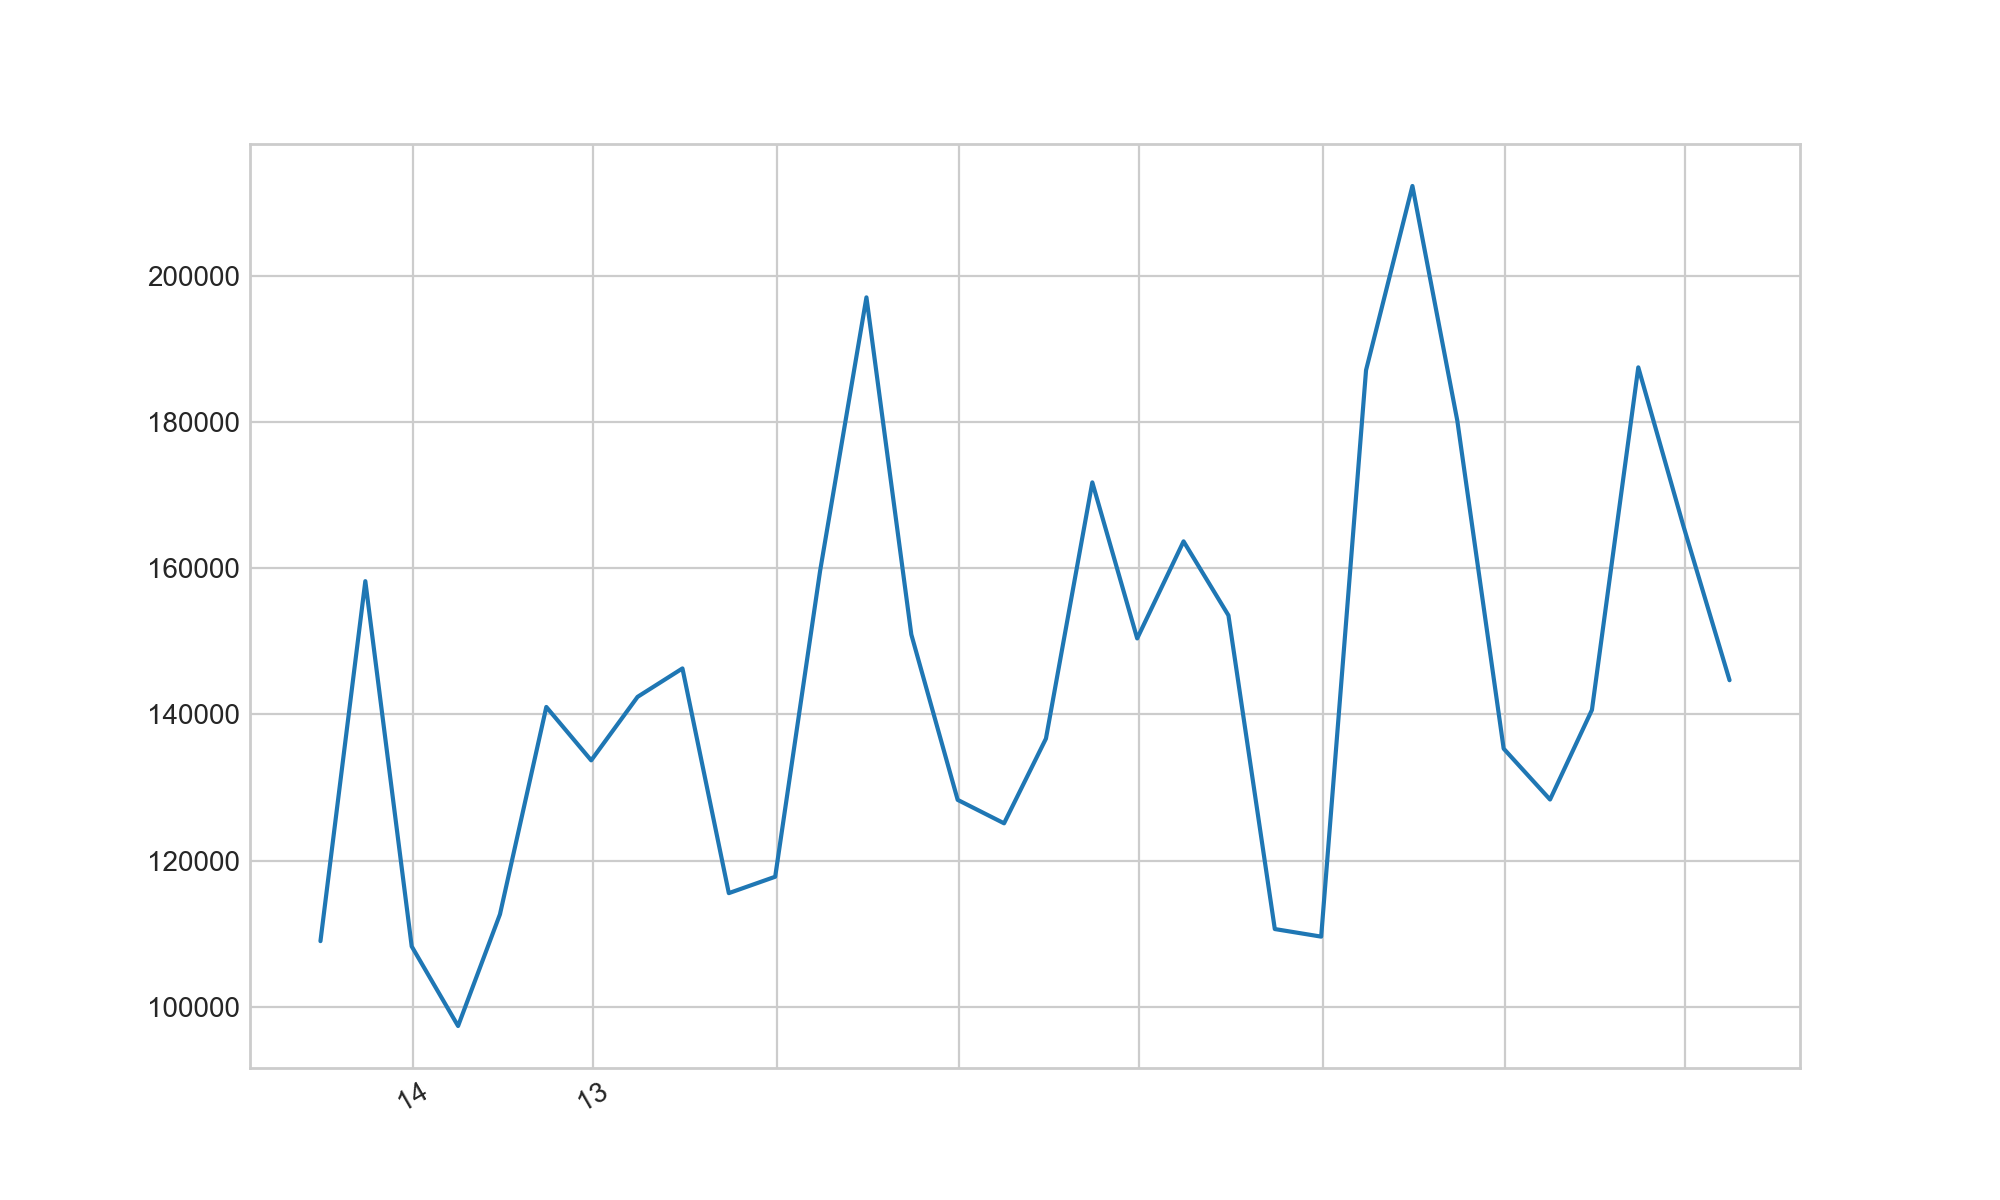

In [72]:
plt.figure(figsize=(10,6))
plt.plot(df_monthly_sum.index, df_monthly_sum);
plt.show()

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Let's have a look at some short term patterns. For the data of the first 3 weeks of January 2014, calculate the hourly counts and visualize them.</li>
</ul> 

</div>

In [93]:
df_2014=df[(df.index>='2014-01-01 00:00:00') & (df.index<='2014-01-21 23:59:59')]
df_2014=pd.Series(data=df_2014.cumul, index=df_2014.index).resample('H').sum()

df_2014.head(10)

datetime
2014-01-01 00:00:00     61.0
2014-01-01 01:00:00     77.0
2014-01-01 02:00:00    124.0
2014-01-01 03:00:00     95.0
2014-01-01 04:00:00     69.0
2014-01-01 05:00:00    114.0
2014-01-01 06:00:00     80.0
2014-01-01 07:00:00     65.0
2014-01-01 08:00:00     28.0
2014-01-01 09:00:00     26.0
Freq: H, Name: cumul, dtype: float64

<IPython.core.display.Javascript object>


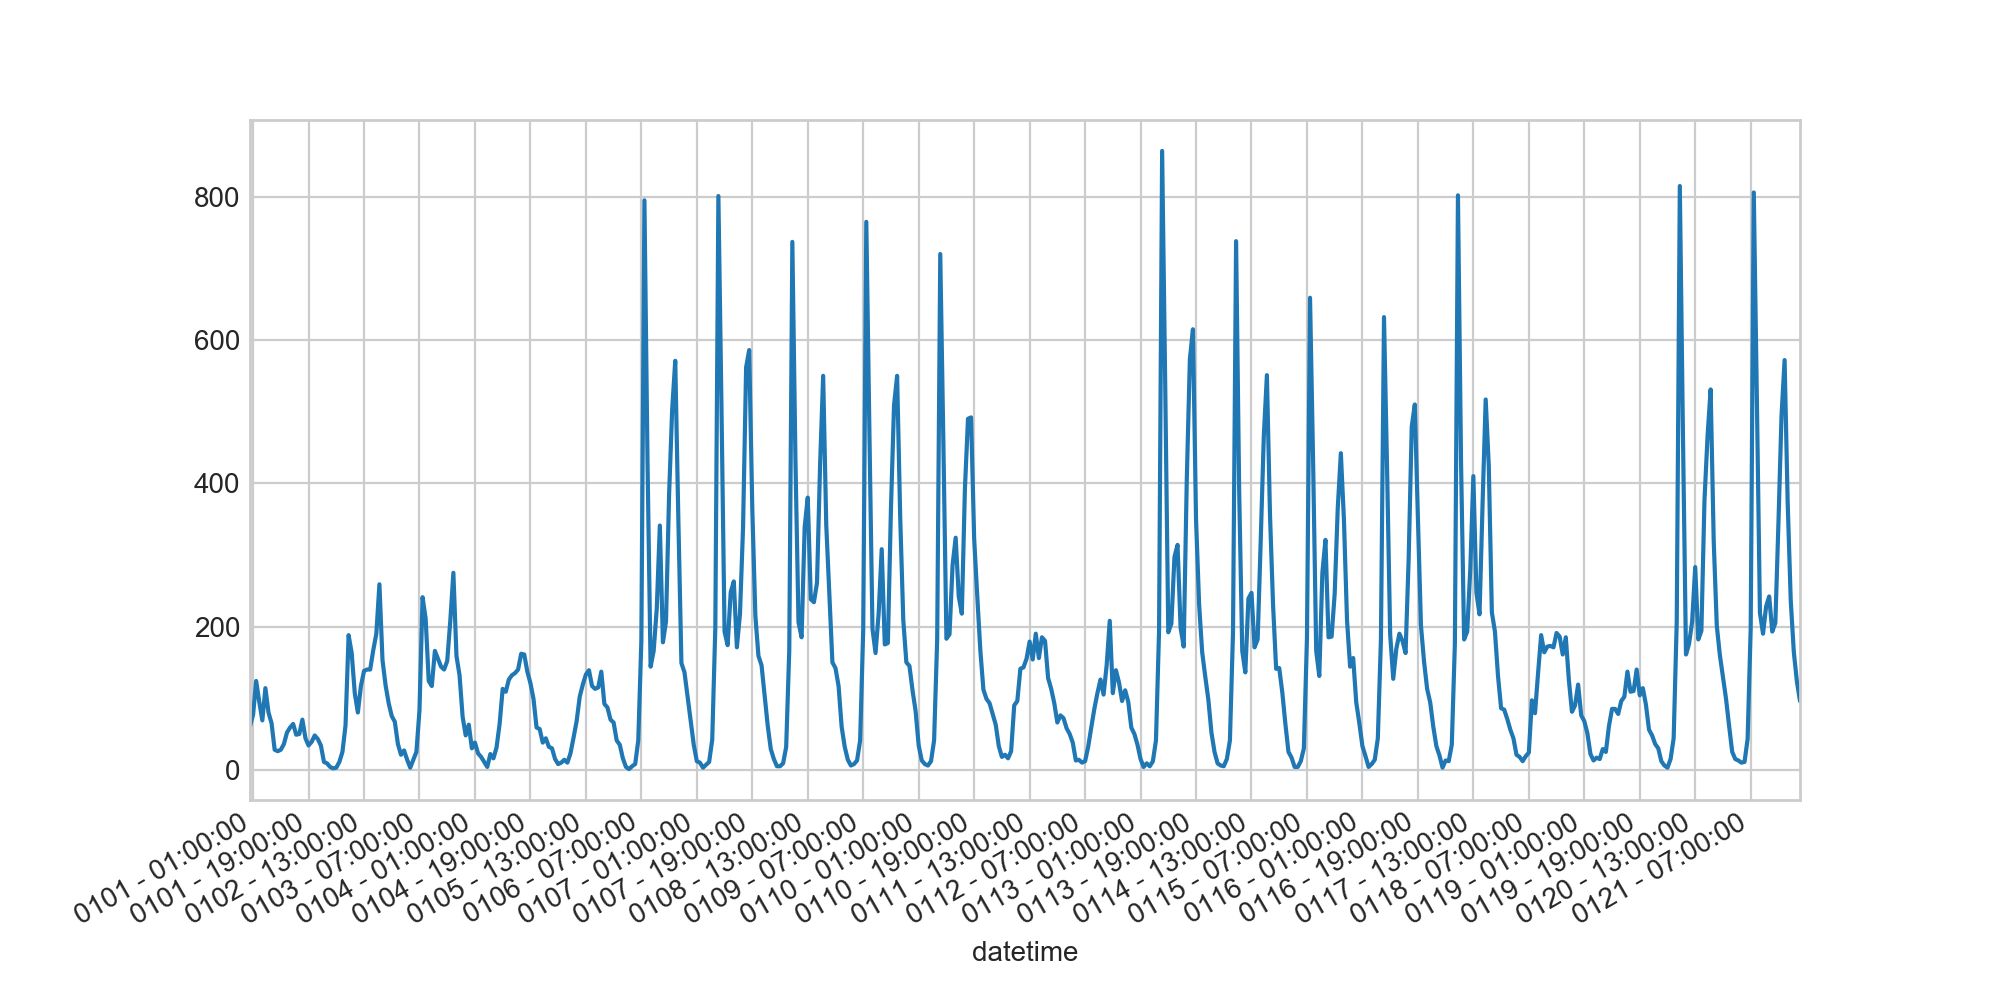

In [126]:
plt.close()
plt.figure(figsize=(10,5))
ax=plt.subplot()
hours = mdates.HourLocator(interval = 18)
h_fmt = mdates.DateFormatter('%m%d - %H:%M:%S')

df_2014.plot(ax = ax, x_compat=True)
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)

plt.show()

**New Year's Eve 2013-2014**

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Select a subset of the data set from 2013-12-31 12:00:00 untill 2014-01-01 12:00:00, store as variable `newyear` and plot this subset</li>
  <li>Use a `rolling` function (check documentation of the function!) to smooth the data of this period and make a plot of the smoothed version</li>
</ul> 

</div>

In [138]:
newyear = df[(df.index>='2013-12-31 12:00:00') & (df.index<='2014-01-01 12:00:00')]

In [139]:
newyear

,nord,sud,active,cumul
datetime,,,,
2013-12-31 12:02:08,13.0,13.0,NaN,26.0
2013-12-31 12:17:08,12.0,18.0,NaN,30.0
2013-12-31 12:32:08,18.0,19.0,NaN,37.0
2013-12-31 12:47:08,19.0,17.0,NaN,36.0
2013-12-31 13:02:08,17.0,22.0,NaN,39.0
...,...,...,...,...
2014-01-01 10:47:08,2.0,1.0,NaN,3.0
2014-01-01 11:02:08,4.0,3.0,NaN,7.0
2014-01-01 11:17:08,7.0,8.0,NaN,15.0


In [142]:
d = newyear.rolling(15).mean()

<IPython.core.display.Javascript object>


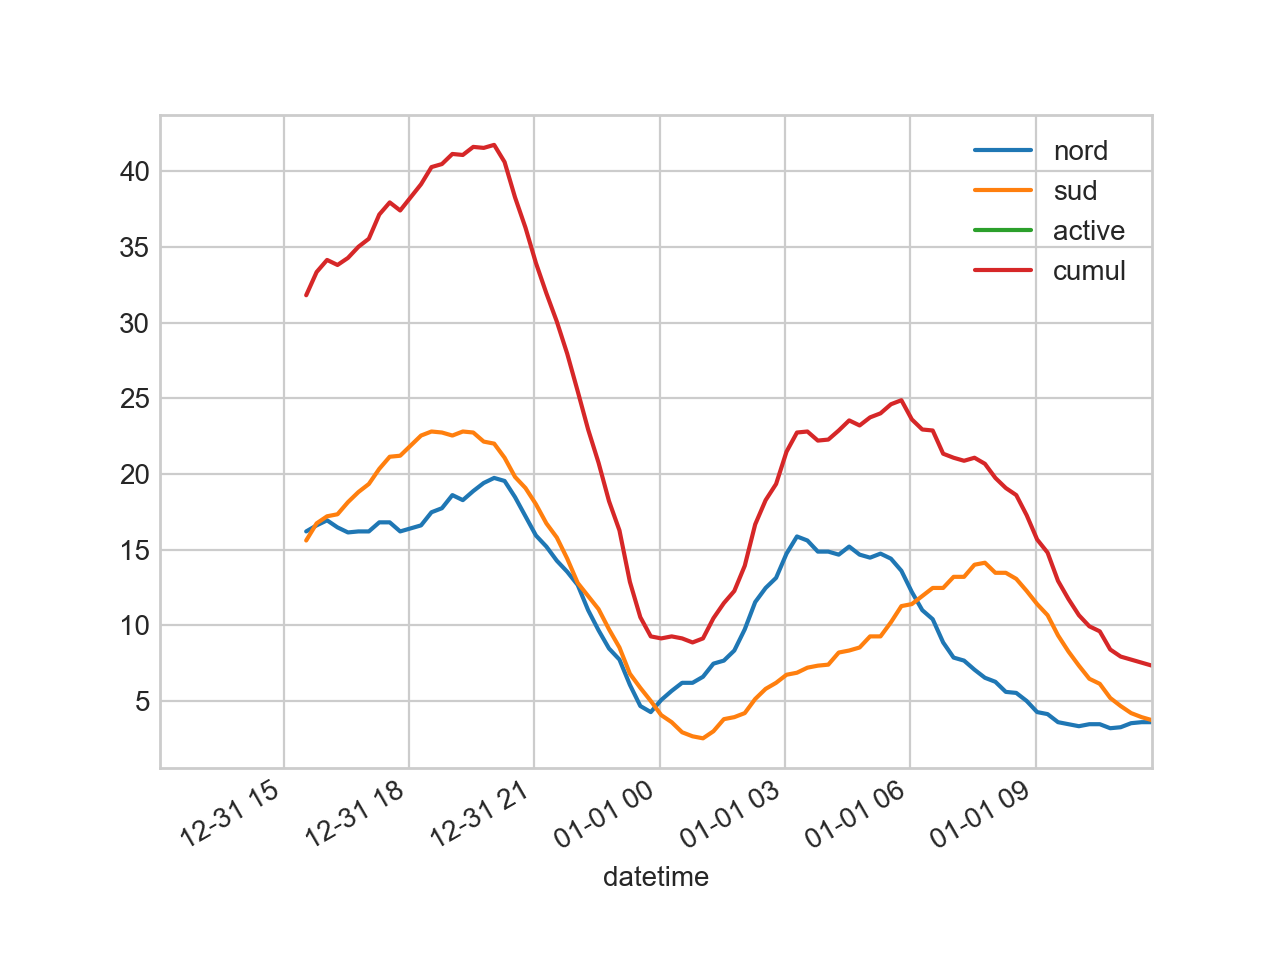

In [143]:
d.plot()

---

## The power of `groupby`...

Looking at the data in the above exercises, there seems to be clearly a:

- daily pattern
- weekly pattern
- yearly pattern

Such patterns can easily be calculated and visualized in pandas using the DatetimeIndex attributes `weekday` combined with `groupby` functionality. Below a taste of the possibilities, and we will learn about this in the proceeding notebooks:

**Weekly pattern**:

In [ ]:
df_daily = df.resample('D').sum()

In [ ]:
df_daily.groupby(df_daily.index.weekday).mean().plot(kind='bar')

**Daily pattern:**

In [ ]:
df_hourly.groupby(df_hourly.index.hour).mean().plot()

So the daily pattern is clearly different for both directions. In the morning more people go north, in the evening more people go south. The morning peak is also more condensed.

**Monthly pattern**

In [131]:
df_monthly = df.resample('M').sum()

In [132]:
from calendar import month_abbr 

<IPython.core.display.Javascript object>


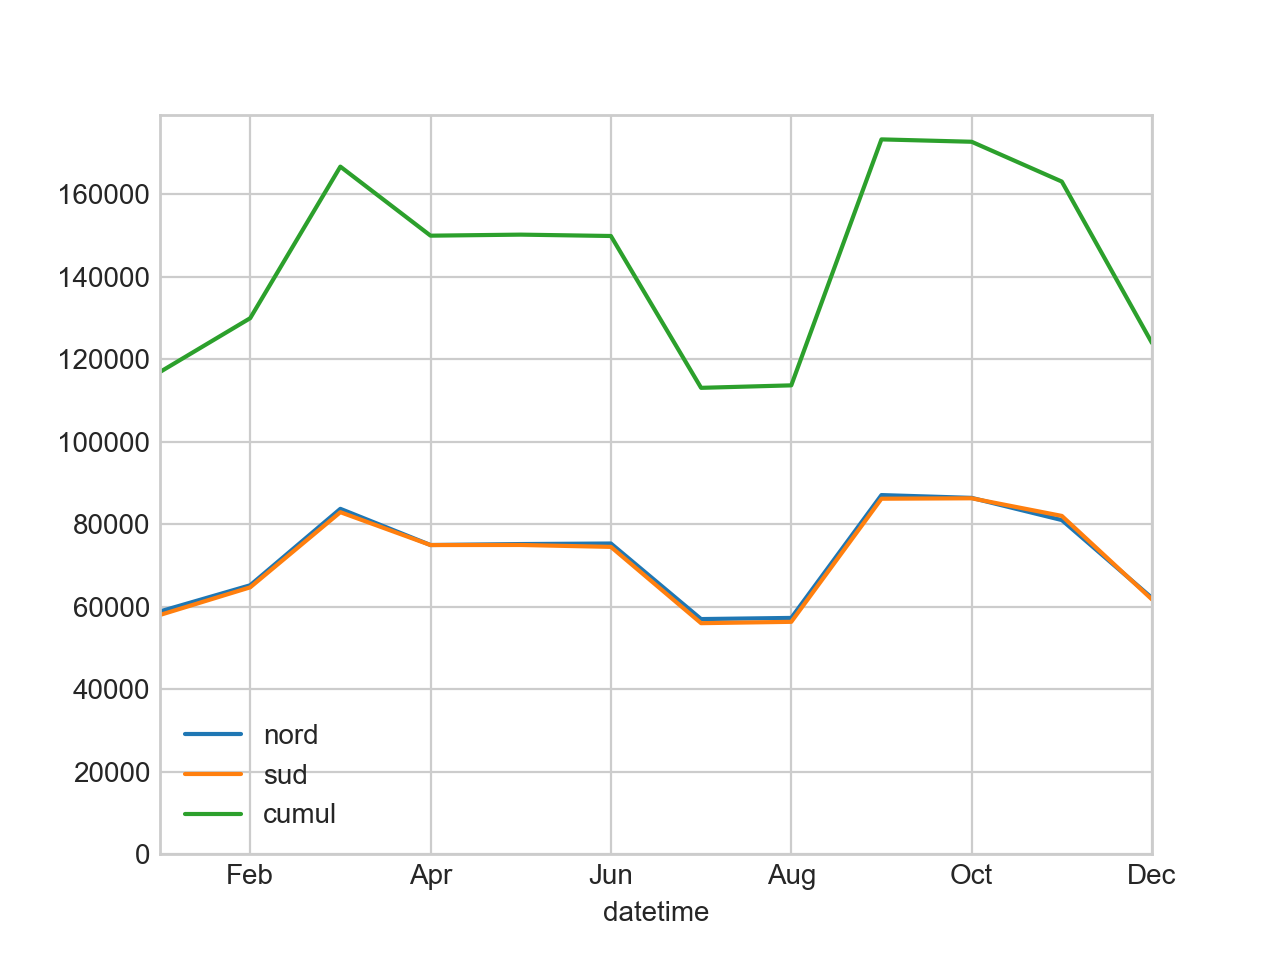

In [136]:
ax = df_monthly.groupby(df_monthly.index.month).mean().plot()
ax.set_ylim(0)
xlabels = ax.set_xticklabels(list(month_abbr)[0::2]) #too lazy to writ the month values yourself...

list(month_abbr)

In [134]:
print(list(month_abbr))

['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
